# Lab 8

In this lab we are going to start perform some data analysis. We will use numpy, pandas, and matplotlib, so lets import them:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.metrics import roc_curve, auc
%matplotlib inline

We will focus on the heart dataset introduced in lecture 23. You can load the dataset using pandas:

In [3]:
df_heart=pd.read_csv("../../Lectures/Lecture-23/heart.csv",dtype='float64')
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
5,57.0,1.0,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
6,56.0,0.0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1.0
7,44.0,1.0,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1.0
8,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1.0
9,57.0,1.0,2.0,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1.0


** Exercise 1: ** Histogram every observable for each of the types of chest pain, for no chest pain, and for any chest pain. Make one figure for each observable, with 2 axes. On one axes compare no chest pain with any chest pain. On the other compare no chest pain with every chest pain catagory. Make sure that every category is uniquely represented in the histogram (e.g. different color). Don't forget to create legends, label axes, and put appropriate titles. In the legend, also indicate the mean and variance. 

Based on your histograms, rank the observables in terms their effectiveness of predicting of chest pain.

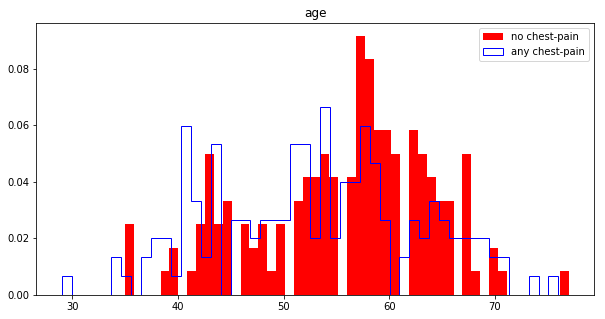

No chest-pain mean: 55.6923076923
Any chest-pain mean: 53.18125
No chest-pain variance: 68.6186121571
Any chest-pain variance: 91.3858984375


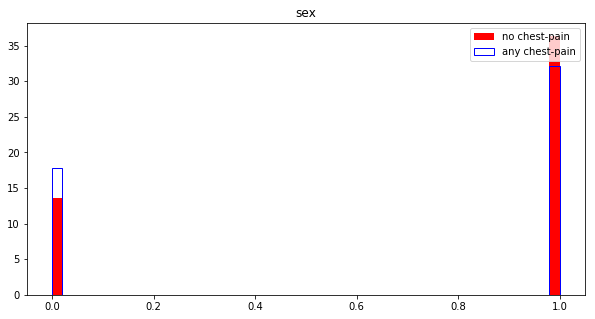

No chest-pain mean: 0.727272727273
Any chest-pain mean: 0.64375
No chest-pain variance: 0.198347107438
Any chest-pain variance: 0.2293359375


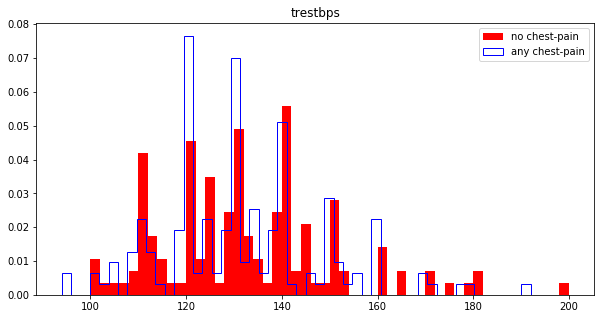

No chest-pain mean: 132.020979021
Any chest-pain mean: 131.26875
No chest-pain variance: 323.027531909
Any chest-pain variance: 291.596523437


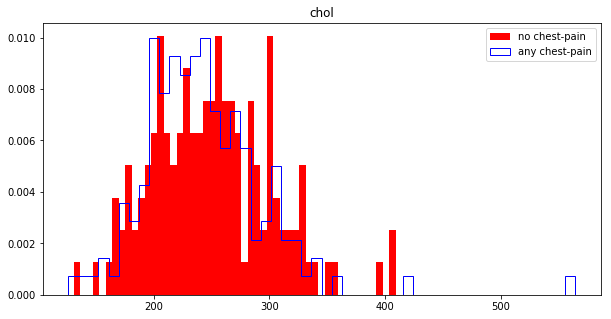

No chest-pain mean: 250.132867133
Any chest-pain mean: 242.80625
No chest-pain variance: 2637.83549318
Any chest-pain variance: 2687.73121094


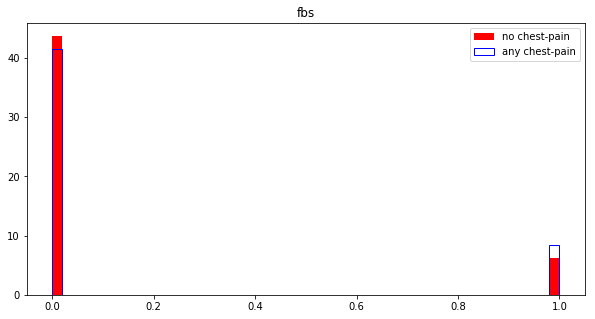

No chest-pain mean: 0.125874125874
Any chest-pain mean: 0.16875
No chest-pain variance: 0.11002983031
Any chest-pain variance: 0.1402734375


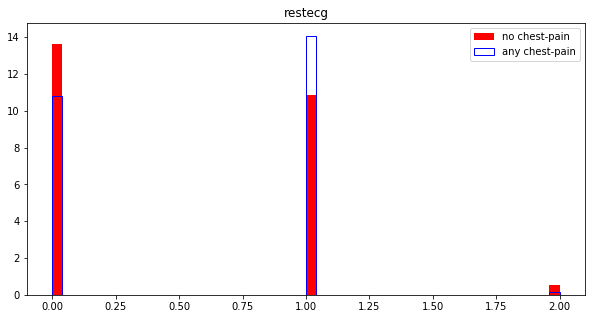

No chest-pain mean: 0.475524475524
Any chest-pain mean: 0.575
No chest-pain variance: 0.29135899066
Any chest-pain variance: 0.256875


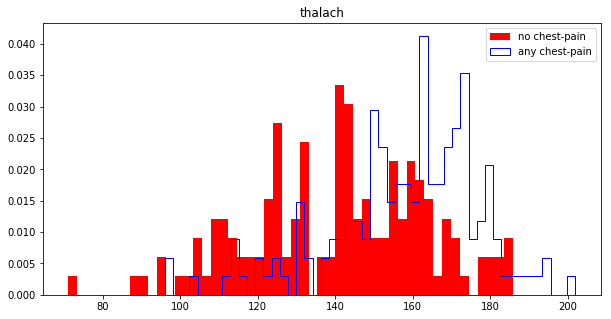

No chest-pain mean: 140.538461538
Any chest-pain mean: 157.7875
No chest-pain variance: 525.269499731
Any chest-pain variance: 380.39234375


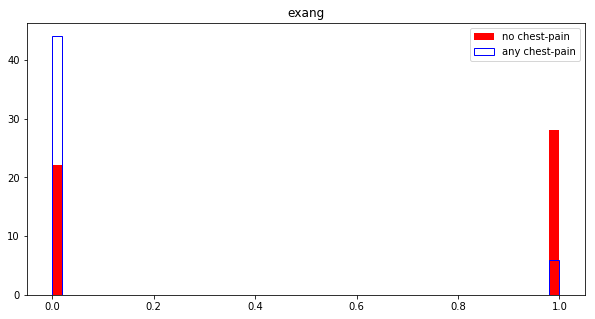

No chest-pain mean: 0.559440559441
Any chest-pain mean: 0.11875
No chest-pain variance: 0.246466819893
Any chest-pain variance: 0.1046484375


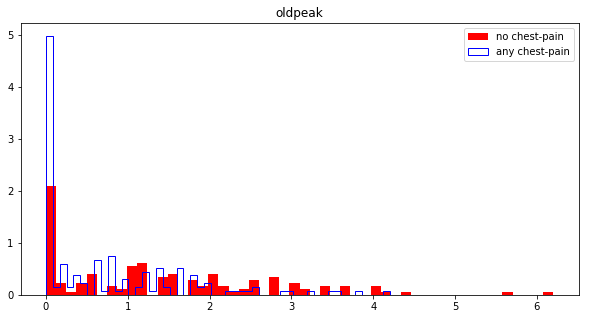

No chest-pain mean: 1.38321678322
Any chest-pain mean: 0.7325
No chest-pain variance: 1.6718861558
Any chest-pain variance: 0.85044375


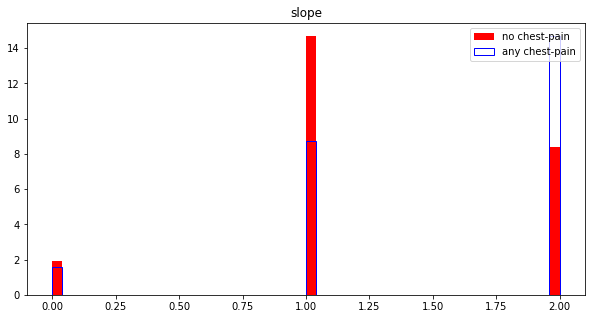

No chest-pain mean: 1.25874125874
Any chest-pain mean: 1.525
No chest-pain variance: 0.345640373612
Any chest-pain variance: 0.374375


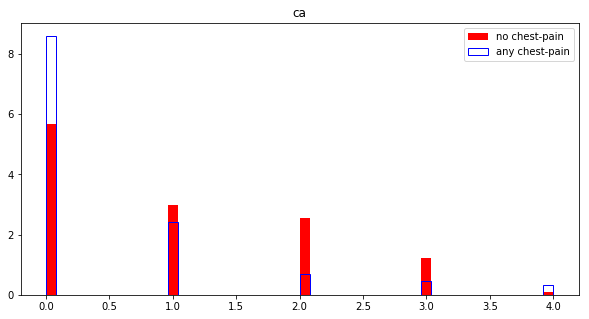

No chest-pain mean: 0.965034965035
Any chest-pain mean: 0.51875
No chest-pain variance: 1.11066555822
Any chest-pain variance: 0.8871484375


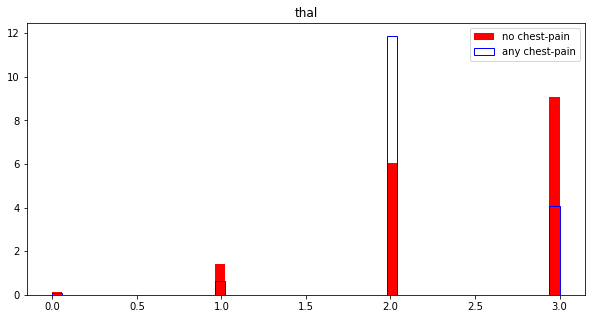

No chest-pain mean: 2.44755244755
Any chest-pain mean: 2.19375
No chest-pain variance: 0.457039464032
Any chest-pain variance: 0.2687109375


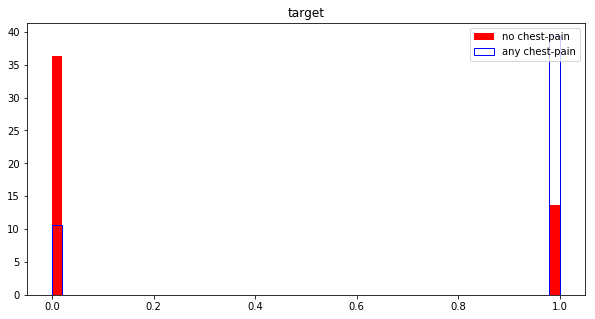

No chest-pain mean: 0.272727272727
Any chest-pain mean: 0.7875
No chest-pain variance: 0.198347107438
Any chest-pain variance: 0.16734375


In [4]:
np_heart = np.array(df_heart)
h_c_tmp = df_heart.columns.tolist()
h_columns = dict(zip(h_c_tmp,range(len(h_c_tmp))))
varName = ["age","sex","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df_nocp = df_heart[df_heart.cp == 0]
df_acp  = df_heart[df_heart.cp != 0]
m1=list()
m2=list()
for var in varName:
    index=np.where(np_heart[:,h_columns["cp"]]==0)
    mean_ncp=np.mean(np_heart[index,h_columns[var]].flatten())
    var_ncp = np.var(np_heart[index,h_columns[var]].flatten())
    index=np.where(np_heart[:,h_columns["cp"]]!=0)
    mean_acp=np.mean(np_heart[index,h_columns[var]].flatten())
    var_acp = np.var(np_heart[index,h_columns[var]].flatten())
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_nocp[var]),bins=50, color="r",label="no chest-pain",density=1.)
    plt.hist(np.array(df_acp[var]),bins=50,histtype="step", color="b", label="any chest-pain",density=1.)
    plt.legend(loc='upper right')
    plt.title(var)
    plt.show()
    m1.append(mean_ncp)
    m2.append(mean_acp)
    print("No chest-pain mean: {}\nAny chest-pain mean: {}\nNo chest-pain variance: {}\nAny chest-pain variance: {}".format(mean_ncp,mean_acp,var_ncp,var_acp))

In [5]:
from collections import Counter
eff_dict = dict(zip(h_c_tmp,np.corrcoef(np.array(np_heart).transpose())[h_columns["cp"]]))
k = Counter(eff_dict)
print("Ranking based on effectiveness of predicting chest pain:")
for k,v in k.most_common(len(k)):
    if(k=="cp"):
        continue
    print("{}: {}".format(k,v))

Ranking based on effectiveness of predicting chest pain:
target: 0.433798261507
thalach: 0.295762124588
slope: 0.119716588535
fbs: 0.0944440349953
trestbps: 0.0476077606446
restecg: 0.0444205925102
sex: -0.049352875347
age: -0.0686530158401
chol: -0.0769043910332
oldpeak: -0.149230158097
thal: -0.16173557051
ca: -0.181053026053
exang: -0.394280268495


** Exercise 2: ** For the top 3 discrete observables, compute the True Positive Rate (TPR) and False Positive Rate (FPR) for predicting chest pain for each value of the observable. Present your results in tables.

In [6]:
dis_obv = ["target","slope","fbs"]
tfpr_tbl=list()
for i in dis_obv:
    tpr= float(df_acp[df_acp[i]>0].shape[0])/df_acp.shape[0]
    fpr= float(df_nocp[df_nocp[i]>0].shape[0])/df_nocp.shape[0]
    tfpr_tbl.append([i,tpr,fpr])
df = pd.DataFrame(data = tfpr_tbl,columns=["","TPR","FPR"])
df.style

,,TPR,FPR
0,target,0.7875,0.272727
1,slope,0.9375,0.923077
2,fbs,0.16875,0.125874


** Exercise 3: ** For the top 3 continuous observables, draw a Reciever Operating Characteristic (ROC) curve and compute the area under the curve. 

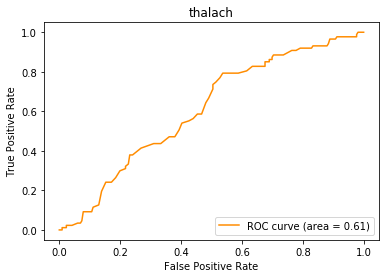

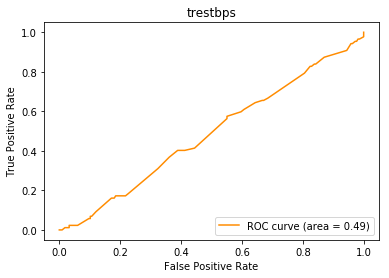

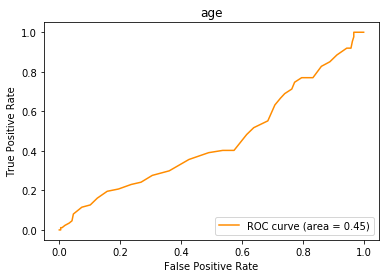

In [7]:
cont_obv = ["thalach","trestbps","age"]
for i in cont_obv:
    fpr, tpr, threshold = roc_curve(df_heart.cp,df_heart[i],pos_label =2)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(i)
    plt.show()

** Exercise 4: ** Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as no chest pain and any chest pain. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example patient in category $i$.

In [8]:
m21 = (np.array(m2) - np.array(m1)).reshape(len(m2),1)
Sb = np.dot(m21,m21.T)
print("Sb[{}]: {}".format(Sb.shape,Sb))
d_nocp = df_nocp.drop("cp", axis=1)
d_acp = df_acp.drop("cp", axis=1)
sum_nocp = list()
for i in range(len(d_nocp)):
    x1 = np.array(d_nocp.iloc[i,:])
    amm = (x1 - m1).reshape(len(x1),1)
    xx = np.dot(amm,amm.T)
    sum_nocp.append(xx)
sum1 = np.array(sum_nocp)
nocp_temp = 0
for i in range(len(sum1)):
    nocp_temp+=sum1[i]
sum_acp = list()
for i in range(len(d_acp)):
    x2 = np.array(d_acp.iloc[i,:])
    amm = (x2 - m2).reshape(len(x2),1)
    xx = np.dot(amm,amm.T)
    sum_acp.append(xx)
sum2 = np.array(sum_acp)
acp_temp = 0
for i in range(len(sum2)):
    acp_temp+=sum2[i]
Sw = nocp_temp + acp_temp
print("\nSw[{}]: {}".format(Sw.shape,Sw))

Sb[(13, 13)]: [[ 6.30541073e+00  2.09730387e-01  1.88889047e+00  1.83975583e+01
  -1.07663794e-01 -2.49788781e-01 -4.33133307e+01  1.10659942e+00
   1.63398738e+00 -6.68591060e-01  1.12064729e+00  6.37312588e-01
  -1.29262402e+00]
 [ 2.09730387e-01  6.97604597e-03  6.28282194e-02  6.11939045e-01
  -3.58110994e-03 -8.30846710e-03 -1.44068674e+00  3.68076774e-02
   5.43496404e-02 -2.22386562e-02  3.72749374e-02  2.11982726e-02
  -4.29952221e-02]
 [ 1.88889047e+00  6.28282194e-02  5.65848500e-01  5.51129403e+00
  -3.22524768e-02 -7.48283764e-02 -1.29752273e+01  3.31500228e-01
   4.89488049e-01 -2.00287552e-01  3.35708502e-01  1.90917567e-01
  -3.87226985e-01]
 [ 1.83975583e+01  6.11939045e-01  5.51129403e+00  5.36793186e+01
  -3.14135114e-01 -7.28819082e-01 -1.26377101e+02  3.22877100e+00
   4.76755273e+00 -1.95077586e+00  3.26975907e+00  1.85951336e+00
  -3.77154268e+00]
 [-1.07663794e-01 -3.58110994e-03 -3.22524768e-02 -3.14135114e-01
   1.83834058e-03  4.26510007e-03  7.39567602e-01 -1

** Exercise 5:** Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

w: [[ 2.58198191e-05]
 [ 1.47516333e-03]
 [ 3.04679868e-05]
 [-1.65222917e-06]
 [ 2.03984822e-03]
 [ 7.50978683e-04]
 [ 6.13172351e-05]
 [-6.08311343e-03]
 [-3.08597291e-04]
 [-6.27565065e-04]
 [-4.26774065e-04]
 [-4.51138627e-04]
 [ 7.14426390e-03]]


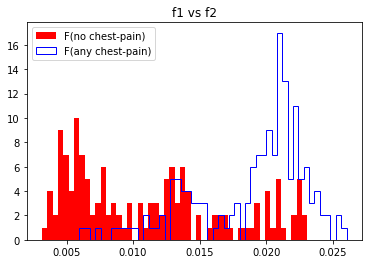

In [9]:
Sw_inv = np.linalg.inv(Sw)
w = np.dot(Sw_inv,m21)
print("w: {}".format(w))
xn = list()
for i in range(len(d_nocp)):
    xn.append(np.array(d_nocp.iloc[i,:]))
xn1 = np.array(xn).T
f1 = np.dot(w.T,xn1)
xn = list()
for i in range(len(d_acp)):
    xn.append(np.array(d_acp.iloc[i,:]))
xn2 = np.array(xn).T
f2 = np.dot(w.T,xn2)
plt.hist(f1.flatten(),bins=50,color="r",label="F(no chest-pain)")
plt.hist(f2.flatten(),bins=50,color="b",histtype="step",label="F(any chest-pain)")
plt.legend(loc="upper left")
plt.title("f1 vs f2")
plt.show()

** Exercise 6: ** Draw the ROC curve for $F_n$. Select a "cut" value for $F_n$ which maximizes TPR / $\sqrt($ FPR + TPR $)$.

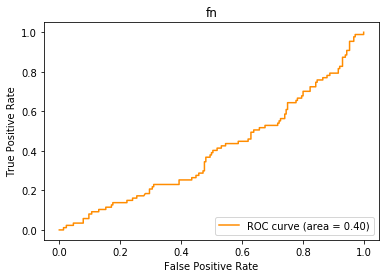

Cut value that maximizes: 0.707106781187


/opt/apps/intel18/python2/2.7.15/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


In [26]:
fn = []
fn.append(f1.flatten())
fn.append(f2.flatten())
fn = np.concatenate(fn)
fpr, tpr, thresholds = roc_curve(df_heart.cp,fn,pos_label =2)
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("fn")
plt.show()
x = np.array(tpr)/(np.sqrt(fpr+tpr))
x.flatten()
x.sort()
cut = x[-2]
print("Cut value that maximizes: {}".format(cut))